
### COMP 4447 DSTools1 Final Project
### Authors: Elizabeth Fugikawa & Heather Lemon

### How Online Dating and Dating App Usage Affect Relationships

**Love**. Love permeates many decisions we have in life. The motivation behind this analysis is to further understand the dynamics of how online dating and cell phone dating app usage affect relationships using the data collected through [Standford's How Couples Meet and Stay Together (HCMST) 2017](https://data.stanford.edu/hcmst2017).

Some details of the data collected include; poltical affilation, mother's highest level of education, demographics, and if you met your sigificant other online or not.

We will looking at exploratory data analysis, feature engineering, cleaning, and visualization. Including basic transformations and normalizations of data.

### Detailed Notes Regarding Original Data Collection
Administered by GFK group project report on behalf of the Standford Couples study.
This new survey, How Couples Meet and Stay Together 2017 (HCMST 2017), features a fresh set of 3,510 survey respondents, with no overlap in subjects from the original HCMST survey which was first fielded in 2009.
HCMST 2017 features new questions about subjects' use of phone apps like Tinder and Grindr for dating and meeting partners.

Specifically, the purpose of this study is to bring knowledge of how couples meet up‐to‐date by
asking detailed questions about both the timing and the social contexts of how Americans meet
their romantic partners. Same‐sex couples have been oversampled both in order to provide
better information about the difficult‐to‐study sexual minority population, and in order to
provide new perspectives on the changing nature of same‐sex couple mating in the US.
Another key purpose is to examine how technology, specifically online dating and cell phone
apps like Tinder and Grindr, affect relationship formation, relationship quality, attachment to
the idea of monogamy, and relationship stability.

### Reference
Rosenfeld, Michael J., Reuben J. Thomas, and Sonia Hausen. 2019 How Couples Meet and Stay Together 2017 fresh sample. Stanford, CA: Stanford University Libraries.

## Table of Contents
> 1. [Exploratory Data Analysis](#Exploratory-Data-Analysis)
    * 1.1 [Missing-Values](#Missing-Values) 
    * 1.2 [Basic Transformations](#Basic-Transformations)
    * 1.3 [Visualizing the Data](#Visualization-of-Data)
         * 1.2.1 [Seaborn PairPlot](#Seaborn-Pairplot)
         * 1.2.2 [Correlation Table](#Correlation-Table)
    * 1.4 [Exploratory Data Analysis Conclusion](#Exploratory-Data-Analysis-Conclusion)
    

# Importing Data

In [4]:
%%bash
# pull data
wget 'https://stacks.stanford.edu/file/druid:hg921sg6829/HCMST_2017_public_data_v1.1_stata.zip'
unzip HCMST_2017_public_data_v1.1_stata.zip
# remove zipped file
rm HCMST_2017_public_data_v1.1_stata.zip
# rename file
mv 'HCMST 2017 fresh sample for public sharing draft v1.1.dta' HCMST2017.dta


--2022-11-01 12:32:30--  https://stacks.stanford.edu/file/druid:hg921sg6829/HCMST_2017_public_data_v1.1_stata.zip
Resolving stacks.stanford.edu (stacks.stanford.edu)... 171.67.37.91
Connecting to stacks.stanford.edu (stacks.stanford.edu)|171.67.37.91|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 463647 (453K) [application/zip]
Saving to: â€˜HCMST_2017_public_data_v1.1_stata.zipâ€™

     0K .......... .......... .......... .......... .......... 11%  114K 4s
    50K .......... .......... .......... .......... .......... 22%  230K 2s
   100K .......... .......... .......... .......... .......... 33%  236K 2s
   150K .......... .......... .......... .......... .......... 44%  278K 1s
   200K .......... .......... .......... .......... .......... 55%  169K 1s
   250K .......... .......... .......... .......... .......... 66%  225K 1s
   300K .......... .......... .......... .......... .......... 77%  228K 1s
   350K .......... .......... .......... .......... ...

CalledProcessError: Command 'b"# pull data\nwget 'https://stacks.stanford.edu/file/druid:hg921sg6829/HCMST_2017_public_data_v1.1_stata.zip'\nunzip HCMST_2017_public_data_v1.1_stata.zip\n# remove zipped file\nrm HCMST_2017_public_data_v1.1_stata.zip\n# rename file\nmv 'HCMST 2017 fresh sample for public sharing draft v1.1.dta' HCMST2017.dta\n"' returned non-zero exit status 1.

# Exploratory Data Analysis

We begin by importing the proper libraries and files

In [6]:
import pandas as pd
import logging
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import scipy
pd.options.display.max_columns = None
import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_stata('HCMST_ver_3.04.dta')
df.head()

,caseid_new,weight1,weight2,ppage,ppagecat,ppagect4,ppeduc,ppeducat,ppethm,ppgender,pphhhead,pphouseholdsize,pphouse,ppincimp,hhinc,ppmarit,ppmsacat,ppreg4,ppreg9,pprent,ppt01,ppt1317,ppt18ov,ppt25,ppt612,children_in_hh,ppwork,ppnet,ppq14arace,pphispan,pprace_white,pprace_black,pprace_nativeamerican,pprace_asianindian,pprace_chinese,pprace_filipino,pprace_japanese,pprace_korean,pprace_vietnamese,pprace_otherasian,pprace_hawaiian,pprace_guamanian,pprace_samoan,pprace_otherpacificislander,pprace_someotherrace,papglb_friend,pppartyid3,papevangelical,papreligion,ppppcmdate_yrmo,pppadate_yrmo,pphhcomp11_member2_age,pphhcomp11_member3_age,pphhcomp11_member4_age,pphhcomp11_member5_age,pphhcomp11_member6_age,pphhcomp11_member7_age,pphhcomp11_member8_age,pphhcomp11_member9_age,pphhcomp11_member10_age,pphhcomp11_member11_age,pphhcomp11_member12_age,pphhcomp11_member13_age,pphhcomp11_member14_age,pphhcomp11_member15_age,pphhcomp11_member2_gender,pphhcomp11_member3_gender,pphhcomp11_member4_gender,pphhcomp11_member5_gender,pphhcomp11_member6_gender,pphhcomp11_member7_gender,pphhcomp11_member8_gender,pphhcomp11_member9_gender,pphhcomp11_member10_gender,pphhcomp11_member11_gender,pphhcomp11_member12_gender,pphhcomp11_member13_gender,pphhcomp11_member14_gender,pphhcomp11_member15_gender,pphhcomp11_member2_relationship,pphhcomp11_member3_relationship,pphhcomp11_member4_relationship,pphhcomp11_member5_relationship,pphhcomp11_member6_relationship,pphhcomp11_member7_relationship,pphhcomp11_member8_relationship,pphhcomp11_member9_relationship,pphhcomp11_member10_relationship,pphhcomp11_member11_relationship,pphhcomp11_member12_relationship,pphhcomp11_member13_relationship,pphhcomp11_member14_relationship,pphhcomp11_member15_relationship,irb_consent,weight3,weight4,weight5,weight6,weight7,weight_couples_coresident,HCMST_main_interview_yrmo,duration,qflag,glbstatus,papglb_status,recsource,s1,s1a,s2,q3_codes,q4,q5,q6a,q6b,q7a,q7b,q8a,q8b,q9,q10,q11,q12,q13a,q13b,q14,q15a1_compressed,q16,q17a,q17b,q17c,q17d,gender_attraction,q18a_1,q18a_2,q18a_3,q18a_refused,q18b_codes,q18c_codes,q19,q20,q21a,q21a_refusal,q21b,q21b_refusal,q21c,q21c_refusal,q21d,q21d_refusal,q21e,q21e_refusal,q22,q23,q24_codes,q25,q26,q27,q28,q29,q30,q31_1,q31_2,q31_3,q31_4,q31_5,q31_6,q31_7,q31_8,q31_9,q31_other_text_entered,q32,q33_1,q33_2,q33_3,q33_4,q33_5,q33_6,q33_7,q33_other_text_entered,q34,q35_codes,q35_text_entered,q24_met_online,summary_q24_total,q24_R_cowork,q24_R_friend,q24_R_family,q24_R_sig_other,q24_R_neighbor,q24_P_cowork,q24_P_friend,q24_P_family,q24_P_sig_other,q24_P_neighbor,q24_btwn_I_cowork,q24_btwn_I_friend,q24_btwn_I_family,q24_btwn_I_sig_other,q24_btwn_I_neighbor,q24_school,q24_college,q24_military,q24_church,q24_vol_org,q24_customer,q24_bar_restaurant,q24_internet_dating,q24_internet_social_networking,q24_internet_game,q24_internet_chat,q24_internet_community,q24_internet_other,q24_public,q24_private_party,q24_blind_date,q24_vacation,q24_singles_service_non_internet,q24_business_trip,q24_work_neighbor,q24_fam_sister_active,q24_fam_brother_active,q24_fam_mother_active,q24_fam_father_active,q24_fam_other_active,q24_fam_cousins_active,q24_fam_aunt_niece_active,q24_fam_uncle_nephew_active,q24_fam_grandmother_active,q24_fam_grandfather_active,q24_fam_sister_passive,q24_fam_brother_passive,q24_fam_mother_passive,q24_fam_father_passive,q24_fam_other_passive,q24_fam_cousins_passive,q24_fam_aunt_niece_passive,q24_fam_uncle_nephew_passive,q24_fam_grandmother_passive,q24_fam_grandfather_passive,q24_fam_female,q24_fam_male,distancemoved_10mi,marrynotreally,marrycountry,civilnotreally,partner_deceased,partner_religion_reclassified,partner_religion_child_reclass,own_religion_child_reclass,q32_internet,how_met_online,either_internet,either_internet_adjusted,same_sex_couple,potential_partner_gender_recodes,alt_partner_gender,how_long_ago_first_met,how_long_ago_first_romantic,how_long_ago_first_cohab,how_long_ago_first_met_cat,how_long_relationship,respondent_race,partner_rac

### Read Stada & Feature Selection

In [8]:
df_numeric = pd.DataFrame()
df_numeric_encoded = pd.DataFrame()
df_categorical = pd.DataFrame()
df_categorical_encoded = pd.DataFrame()

# Divide data into numeric or categorical responses
df_numeric = df[['ppage', 'ppagecat', 'hhinc']].rename\
    ({'ppage': 'age', 'ppagecat': 'cat_age'}, axis=1)

df_categorical = df[['ppgender', 'ppeducat', 'ppincimp',
                               'ppwork', 'pppartyid3', 'ppreg9',
                               'ppmarit', 'q24_met_online',
                               'papreligion', 'relationship_quality']].rename(
            columns={'ppgender': 'gender',
                     'ppeducat': 'educ',
                     'ppincimp': "incomecat",
                     'ppwork': 'job_status',
                     'pppartyid3': 'political_aff',
                     'ppreg9': 'region',
                     'papreligion': 'religion',
                     'w6_otherdate_app_2': 'app_used',
                     'ppmarit': 'marital_status',
                     'q24_met_online': 'met_online'})

### Introduction to Dataset

In [9]:
df_numeric['hhinc'] = df_numeric['hhinc'].astype(int)
print(df_categorical_encoded.head())
print(df_numeric_encoded.head())
df_numeric_encoded = pd.get_dummies(df_numeric)
df_categorical_encoded = pd.get_dummies(df_categorical)

Empty DataFrame
Columns: []
Index: []
Empty DataFrame
Columns: []
Index: []


# DataTypes

In [10]:
print(df_numeric.dtypes)
print(df_categorical.dtypes)

age        category
cat_age    category
hhinc         int32
dtype: object
gender                  category
educ                    category
incomecat               category
job_status              category
political_aff           category
region                  category
marital_status          category
met_online              category
religion                category
relationship_quality    category
dtype: object


### Null Check

In [11]:
print(df_categorical.isnull().sum())
print(df_numeric.isnull().sum())

gender                     0
educ                       0
incomecat                  0
job_status                 0
political_aff              0
region                     0
marital_status             0
met_online              1068
religion                  15
relationship_quality    1006
dtype: int64
age        0
cat_age    0
hhinc      0
dtype: int64


### Describe dataset

In [12]:
print(df_categorical_encoded.describe())
print(df_numeric_encoded.describe())

       gender_male  gender_female  educ_less than high school  \
count  4002.000000    4002.000000                 4002.000000   
mean      0.491504       0.508496                    0.099450   
std       0.499990       0.499990                    0.299303   
min       0.000000       0.000000                    0.000000   
25%       0.000000       0.000000                    0.000000   
50%       0.000000       1.000000                    0.000000   
75%       1.000000       1.000000                    0.000000   
max       1.000000       1.000000                    1.000000   

       educ_high school  educ_some college  educ_bachelor's degree or higher  \
count       4002.000000        4002.000000                       4002.000000   
mean           0.246627           0.302349                          0.351574   
std            0.431101           0.459333                          0.477521   
min            0.000000           0.000000                          0.000000   
25%           

In [13]:
months=['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
counts = []
for m in months:
    count = df_numeric['month_met'].value_counts()[m]
    counts.append(count)
month_df = pd.DataFrame({'month': months, 'count': counts})
p = sns.barplot(x='month', y='count', data=month_df, palette='hls')
p.set(xlabel='Month', ylabel='Count', title='Month That Couples Met')
p.tick_params(axis='x', rotation=45)
plt.show()

KeyError: 'month_met'

In [14]:
big_df = pd.concat([df_numeric, df_categorical], axis=1)
t1 = big_df.pivot_table(values=["hhinc"], index=["region"], aggfunc=np.mean)
t2 = big_df.pivot_table(values=["id"], index=["marital_status", "met_online"], aggfunc='count')
t3 = big_df.pivot_table(values=["id"], index=["political_aff", "cat_age"], aggfunc='count')

KeyError: 'id'

<AxesSubplot: xlabel='gender', ylabel='count'>

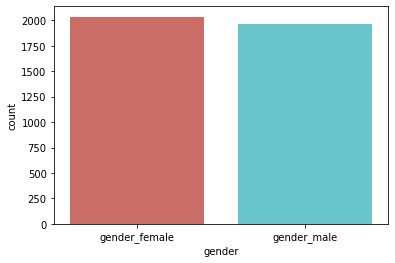

In [15]:
# Visualize gender representative
female_count = df_categorical_encoded['gender_female'].value_counts()[1]
male_count = df_categorical_encoded['gender_male'].value_counts()[1]
gender = pd.DataFrame({'gender': ['gender_female', 'gender_male'], 'count': [female_count, male_count]})
sns.barplot(x='gender', y='count', data=gender, palette='hls')

Text(0.5, 1.0, 'Political Party Affiliation Representation')

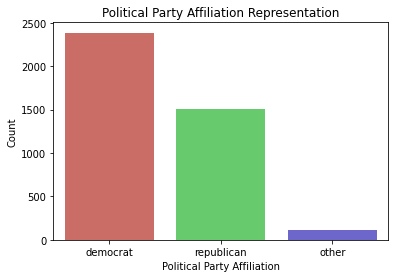

In [16]:
# Visualize political representative
democrat_count = df_categorical_encoded['political_aff_democrat'].value_counts()[1]
republican_count = df_categorical_encoded['political_aff_republican'].value_counts()[1]
other_count = df_categorical_encoded['political_aff_other'].value_counts()[1]
party_aff = pd.DataFrame({'political_party': ['democrat', 'republican', 'other'],
                          'count': [democrat_count, republican_count, other_count]})
sns.barplot(x='political_party', y='count', data=party_aff, palette="hls")
plt.xlabel('Political Party Affiliation')
plt.ylabel('Count')
plt.title('Political Party Affiliation Representation')

In [17]:
age_col_df = df_numeric_encoded.iloc[2:, :10]
age_col_df.drop(labels='id', axis=1, inplace=True)
age_col_df.drop(labels='age', axis=1, inplace=True)
age_col_df.drop(labels='hhinc', axis=1, inplace=True)
count_df = pd.DataFrame({'count': age_col_df.sum()})
count_df.rename(index={'cat_age_18-24': '18-24', 'cat_age_25-34': '25-34',
                       'cat_age_35-44': '35-44', 'cat_age_45-54': '45-54',
                       'cat_age_55-64': '55-64', 'cat_age_65-74': '65-74',
                       'cat_age_75+': '75+'}, inplace=True)
count_df.reset_index(inplace=True)
count_df.rename(columns={'index': 'age'}, inplace=True)
sns.barplot(x='age', y='count', data=count_df, palette='hls')

KeyError: "['id'] not found in axis"

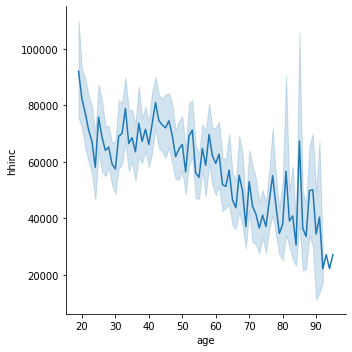

In [18]:
sns.relplot(x='age', y='hhinc', kind='line', data=df_numeric)
# sns.pairplot(df_numeric, x_vars=['age'], y_vars=['hhinc'], palette='hls', hue='hhinc', height=5)

In [19]:
model = sm.OLS(df_categorical_encoded['met_online_met offline'], df_numeric['hhinc'])
results = model.fit()
print(results.params)
print(results.summary())

hhinc    0.000008
dtype: float64
                                   OLS Regression Results                                  
Dep. Variable:     met_online_met offline   R-squared (uncentered):                 -10.736
Model:                                OLS   Adj. R-squared (uncentered):            -10.739
Method:                     Least Squares   F-statistic:                             -3660.
Date:                    Tue, 01 Nov 2022   Prob (F-statistic):                        1.00
Time:                            12:33:10   Log-Likelihood:                         -3302.4
No. Observations:                    4002   AIC:                                      6607.
Df Residuals:                        4001   BIC:                                      6613.
Df Model:                               1                                                  
Covariance Type:                nonrobust                                                  
                 coef    std err          t    

In [20]:
np.random.seed(1)
print(scipy.stats.shapiro(df_categorical_encoded['political_aff_democrat']))
print(scipy.stats.shapiro(df_categorical_encoded['political_aff_republican']))
print(scipy.stats.shapiro(df_categorical_encoded['political_aff_other'].sample(n=500)))

ShapiroResult(statistic=0.623072624206543, pvalue=0.0)
ShapiroResult(statistic=0.6139096021652222, pvalue=0.0)
ShapiroResult(statistic=0.19334465265274048, pvalue=1.1784920084971712e-41)


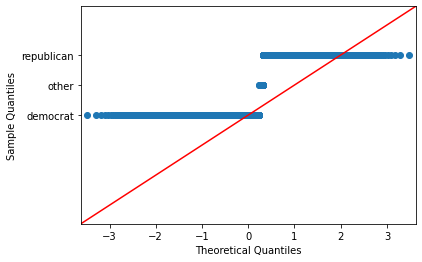

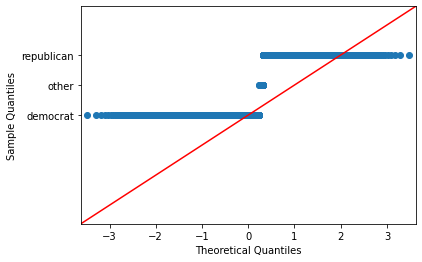

In [21]:
sm.qqplot(data=df_categorical['political_aff'], line='45')